# Sales Analysis of Electronics Company
<br></br>
#### Mayte Steeghs - 03/2021
***
<br></br>

#### Description

This juypter notebook is a demonstration of an holistic analysis of a dataset of electronics sales using pandas. There are 12 months of sales data broken down by month, product type, cost, purchase address, etc.


Skills demonstrated:

1 - Cleaning data
- Removing null values from DataFrame
- Removing rows based on a condition
- Changing the type of a column to the appropriate datatype

2 - Exporing business questions related to our data
- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?

3 - Pandas and Mathplotlib methods used:
- Concatenating multiple csvs together to create a new DataFrame (pd.concat)
- Adding columns
- Parsing cells as strings to make new columns (.str)
- Using the .apply() method - functional programming
- Using groupby to perform aggregate analysis
- Plotting bar charts and lines graphs to visualize our results
- Labeling our graphs

Adapted from [Tutorial by Keith Galli](https://www.youtube.com/watch?v=eMOA1pPVUc4&list=PLBOTBwkcXrfe2vpmZ7Vs20v4JiVj8GbI-&index=2&t=225s)

*****

# Reading Data Files

*****

#### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Merge the 12 months of sales data into a single file

In [2]:
files = [file for file in os.listdir('./Sales_Data')]

all_months = pd.DataFrame()

# Concatenate each file in the directory
for file in files:
    each_month = pd.read_csv("./Sales_Data/"+file)
    all_months = pd.concat([all_months, each_month])
    
# Convert this file to a CSV
all_months.to_csv("merged_data.csv", index=False)

#### Read in merged data frame

In [3]:
merged_data = pd.read_csv("merged_data.csv")

***
# Clean up Data
***

#### Drop rows with Null (NaN)

In [4]:
nan_df = merged_data[merged_data.isna().any(axis=1)]
merged_data = merged_data.dropna(how='all')

#### Find misformatted data with 'OR' and delete it

In [5]:
merged_data = merged_data[merged_data['Order Date'].str[0:2] != 'Or']

#### Convert columns to the correct data type

In [6]:
# Convert to int
merged_data['Quantity Ordered'] = pd.to_numeric(merged_data['Quantity Ordered'])

# Convert to float
merged_data['Price Each'] = pd.to_numeric(merged_data['Price Each'])

***
# Augment Data with Additional Columns
***

#### Month Column

In [7]:
merged_data['Month'] = merged_data['Order Date'].str[0:2]
merged_data['Month'] = merged_data['Month'].astype('int32')

#### City Column

In [8]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

merged_data['City'] = merged_data['Purchase Address'].apply(lambda x: f"{get_city(x)} {get_state(x)}")

#### Sales Column

In [9]:
merged_data['Sales'] = merged_data['Quantity Ordered'] * merged_data['Price Each']

#### Hours and Minutes Columns

In [10]:
#Convert the Strings in the Order Date column to DateTime objects
merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date'])

In [11]:
merged_data['Hour'] = merged_data['Order Date'].dt.hour
merged_data['Minute'] = merged_data['Order Date'].dt.minute

***
# Sales Analysis
***

### Question 1: What was the best month for sales? How much was earned that month?

This question asks the user to quantify performance of the business per month. This provides us with a yearly overview from which may be used for further analysis. This data could reflect the holistic performance of certain metrics such as effectiveness of a certain marketing strategy.

In [12]:
sales_monthly = merged_data.groupby('Month').sum()

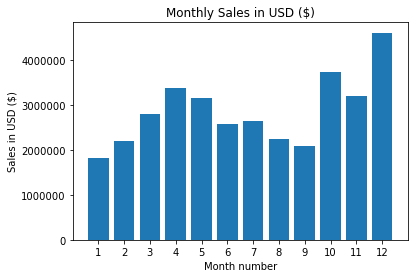

In [13]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, sales_monthly['Sales'])
plt.title('Monthly Sales in USD ($)')
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()

***
We see a gradual increase in sales towards spring and then a slow decline followed by a sharp spike in the last months of the year.

Conclusion: 
We see a clear spike in sales around December, which is likely due to the (inter)national holiday of Christmas which boosts sales as a result of a gift giving culture associated with it. When given more information such as the release dates of certain products, when certain marketing strategies where implemented etc. further analysis could be performed and more conclusions could be drawn.

***
### Question 2: What city sold the most product?

Knowing which locations sell the most products is a valuable information to interpret the ideal distribution of resources. This infromation could either be used to stimulate sales in a certain area where sales have been low or focus on the areas where sales are exceptionally high. This could help businesses decide where to hire more staff or open more stores.  

In [14]:
sales_city = merged_data.groupby('City').sum()
sales_city.head()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06,214264,442932
Austin TX,11153,1.809874e+06,69829,1.819582e+06,141946,289060
Boston MA,22528,3.637410e+06,141112,3.661642e+06,288225,590442
Dallas TX,16730,2.752628e+06,104620,2.767975e+06,214390,435155
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06,427444,866638


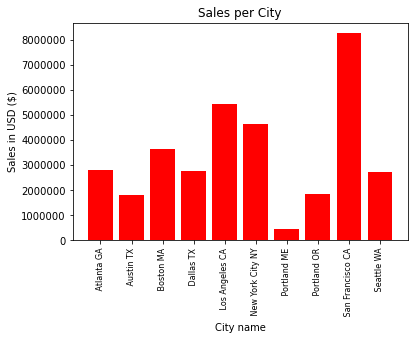

In [15]:
# Note that order matters, hence, two parameters were used
cities = [city for city, df in merged_data.groupby('City')]

plt.bar(cities, sales_city['Sales'], color='r')
plt.title("Sales per City")
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()

***
Conclusion:
Firstly, we can see that the city of Portland (Maine) had by far the least sales. This could be explained by the fact that it has the smallest population of the cities where there were sales. We could further explore the sales per city by analyzing the sales per city per capita to isolate certain other metrics. 

Secondly, we can clearly see that San Fransico has the highest sales. This could be explained by the fact that the GDP per state is very high in California and individuals likely have greater amounts of displosable income to spend on electronics. Secondly, San Fransico is near Silicon Valley, specialized in the development of technology. This could indicate that residents are more exposed to marketing of electronics and are therefore more likely to buy product.

***
### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

Timing is essential in marketing. Knowing when your customers are most active and most likely to buy a certain product is valuable information that can be used to boost sales. By analyzing the total amounts of products sold per hour of the day we can deduct what time would be ideal to place advertisements.

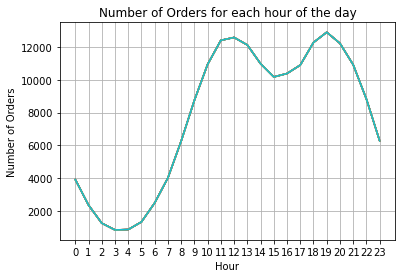

In [16]:
hours = [hour for hour, df in merged_data.groupby('Hour')]

plt.plot(hours, merged_data.groupby(['Hour']).count())
plt.title("Number of Orders for each hour of the day")
plt.xticks(hours)
plt.grid()
plt.ylabel("Number of Orders")
plt.xlabel("Hour")
plt.show()

***
Conclusion:

From the graph above we can see that total amount of orders varies greatly per time of day, indicating that the activity of customers influences sales directly. Between 12 am and 8 am there are very little sales, likely because everyone is sleeping. This however, does not account for the time difference between the cities which could skew the data. Hence, further analysis could be performed to determine the best time to display advertisements per time zone to gather more accurate data.

We can conclude here that the best time to place advertisements is around 11am and after office hours, around 7pm. Idealy, you might consider placing the orders slightly before this time to have customers be ready to check out at the most advantagous time.

***
### Question 4: What products are most often sold together?

Knowing which combinations sell best could be used to devise deals or advertise in a certain order to encourage buying these two products together.

In [17]:
duplicates = merged_data[merged_data['Order ID'].duplicated(keep=False)]

# Concatenate the products from various rows grouped by Order ID
duplicates['Grouped'] = duplicates.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
duplicates = duplicates[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-17-2df6b557d107>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates['Grouped'] = duplicates.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))


In [18]:
from itertools import combinations
from collections import Counter

count = Counter()

#For each combination of the product in the grouped list, count how many instances there are
for row in duplicates['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
# Print the 10 most frequently occuring combinations of sales
for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


***
Conclusion:

The most common combinations usually include a more expensive item, like a phone, and a cheaper item, like a charger or headphones. The most popular combinations were phones and charging cables and subsequently, phones and headphones. This information could be used to sell package deals that would further encourage customers to buy both products, boosting sales.

***
### Question 5: What product sold the most?

From the analysis below we can identify which products sold most and with additional data such as marketing campaigns one could draw conclusions about how certain factors affect sales of a certain product.

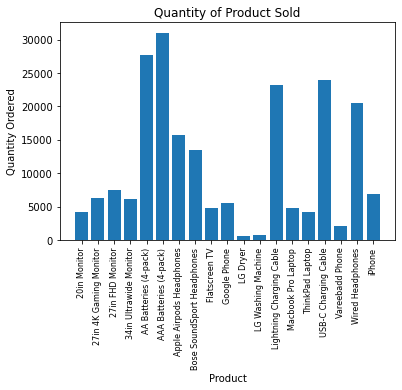

In [19]:
product_group = merged_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

# Order matters to ensure proper labeling, hence, two parameters were used.
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.title("Quantity of Product Sold")
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

***
Conclusion: 

It is clear that the most popular products are cheaper products that are also bought more frequently such as batteries and chargers. Products with the least sales include phones and laptops which are generally long term investments. This calls for further analysis on the effect of product price on the quantity of sales

<ipython-input-20-02bf46abf809>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


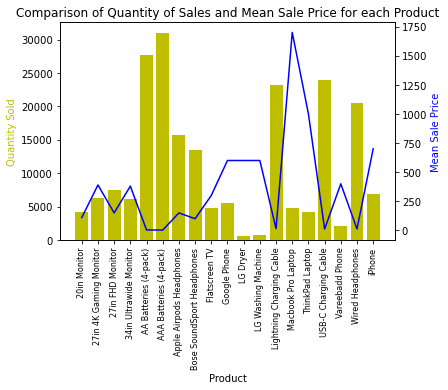

In [20]:
prices = merged_data.groupby('Product').mean()['Price Each']

fix, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='y')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Sold', color='y')
ax2.set_ylabel('Mean Sale Price', color='b')
plt.title("Comparison of Quantity of Sales and Mean Sale Price for each Product")

ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

***
Conclusion:

From the graph below we see that the blue line and yellow bar are inversely proportional at many points (for example, "MacBook Pro Laptop" has the highest mean sale price and a very low quantity of sales) which would indicate that price strongly affects the sales of a product. This of course, follows the fundemental laws of economics, supply and demand. However, what is more interesting is the products that do not follow this convention. This would indicate that there are other factors which determine the quantity of sales, for example, innovation, marketability etc.